In [ ]:
!pip install sentence-transformers nltk python-docx PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 854.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [ ]:
from sentence_transformers import SentenceTransformer, util
import re

# Load the Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def get_sentences(text):
    # Split text into sentences using punctuation
    sentences = re.split(r'(?<=[.!?]) +', text.strip())
    return [s.strip() for s in sentences if s.strip()]

def compute_similarity(text1, text2, threshold=0.75):
    sent1 = get_sentences(text1)
    sent2 = get_sentences(text2)

    emb1 = model.encode(sent1, convert_to_tensor=True)
    emb2 = model.encode(sent2, convert_to_tensor=True)

    cosine_scores = util.pytorch_cos_sim(emb1, emb2)

    matches = []
    for i in range(len(sent1)):
        for j in range(len(sent2)):
            score = cosine_scores[i][j].item()
            if score >= threshold:
                matches.append((sent1[i], sent2[j], score))

    return matches


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving file1.txt to file1.txt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving file2.txt to file2.txt


In [ ]:
with open("file1.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

with open("file2.txt", "r", encoding="utf-8") as f:
    text2 = f.read()



In [ ]:
matches = compute_similarity(text1, text2, threshold=0.6)

if matches:
    print(f"🔍 Found {len(matches)} matching sentence pairs:\n")
    for i, (a, b, score) in enumerate(matches, 1):
        print(f"🔹 Match {i}:")
        print(f"Text 1: {a}")
        print(f"Text 2: {b}")
        print(f"🧠 Similarity Score: {round(score, 2)}\n{'-'*60}")
else:
    print("✅ No significant plagiarism detected.")



🔍 Found 14 matching sentence pairs:

🔹 Match 1:
Text 1: Artificial Intelligence (AI) is revolutionizing industries by enabling machines to think and learn like humans.
Text 2: Industries around the world are being transformed by artificial intelligence, which empowers computers to mimic human cognitive processes.
🧠 Similarity Score: 0.78
------------------------------------------------------------
🔹 Match 2:
Text 1: Artificial Intelligence (AI) is revolutionizing industries by enabling machines to think and learn like humans.
Text 2: At its core, machine learning — a subset of AI — enables machines to extract knowledge from data and enhance their performance over time.

With the help of machine learning, systems are capable of discovering trends in massive datasets and utilizing those patterns to make informed predictions.
🧠 Similarity Score: 0.61
------------------------------------------------------------
🔹 Match 3:
Text 1: From healthcare to finance, AI is driving efficiencies and u

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline


In [ ]:
import pandas as pd

df = pd.DataFrame(matches, columns=["Sentence_File1", "Sentence_File2", "Similarity_Score"])
df.to_csv("similarity_output.csv", index=False)
df.head()


,Sentence_File1,Sentence_File2,Similarity_Score
0,Artificial Intelligence (AI) is revolutionizin...,Industries around the world are being transfor...,0.776274
1,Artificial Intelligence (AI) is revolutionizin...,"At its core, machine learning — a subset of AI...",0.613529
2,"From healthcare to finance, AI is driving effi...","From the financial sector to hospitals, AI str...",0.666464
3,"From healthcare to finance, AI is driving effi...",This ability has opened the doors to breakthro...,0.644066
4,One of the key components of AI is machine lea...,"At its core, machine learning — a subset of AI...",0.809021


       Similarity_Score
count         14.000000
mean           0.702012
std            0.090850
min            0.602546
25%            0.632823
50%            0.665545
75%            0.794832
max            0.843185


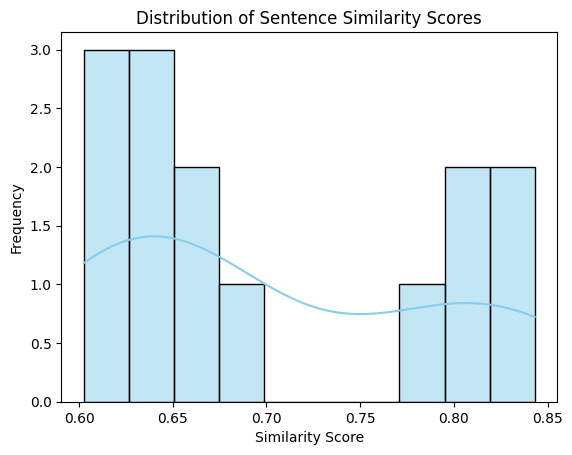

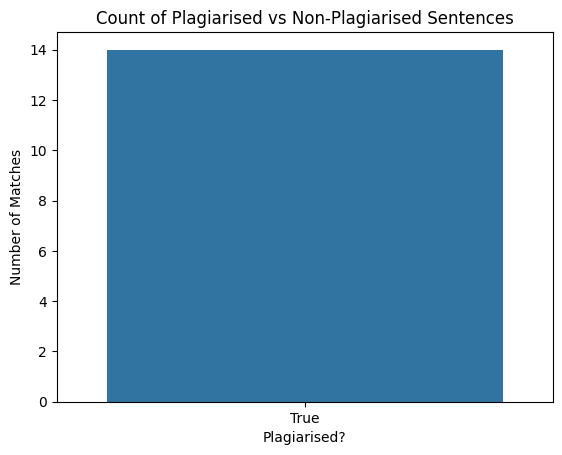

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated CSV
df = pd.read_csv("similarity_output.csv")

# Basic Summary
print(df.describe())

# Plot distribution of similarity scores
sns.histplot(df['Similarity_Score'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Sentence Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# Add Plagiarism Label based on threshold
df['Plagiarised'] = df['Similarity_Score'] >= 0.6

# Count Plot
sns.countplot(x='Plagiarised', data=df)
plt.title("Count of Plagiarised vs Non-Plagiarised Sentences")
plt.xlabel("Plagiarised?")
plt.ylabel("Number of Matches")
plt.show()


In [ ]:
total_matches = len(df)
plagiarised_matches = df['Plagiarised'].sum()
percentage = (plagiarised_matches / total_matches) * 100

print(f"🔢 Plagiarised Matches: {plagiarised_matches}/{total_matches}")
print(f"📊 Percentage Plagiarised: {percentage:.2f}%")


🔢 Plagiarised Matches: 14/14
📊 Percentage Plagiarised: 100.00%


In [ ]:
import pandas as pd

df = pd.read_csv("similarity_output_task3.csv")
print(df['Plagiarised'].value_counts())  # Should show both 1 and 0


Plagiarised
1    25
0    25
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Similarity_Score']]
y = df['Plagiarised']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[5 0]
 [0 5]]
Accuracy: 1.0
F1 Score: 1.0


In [ ]:
X = df.drop(columns=["Plagiarised"])
y = df["Plagiarised"]


In [ ]:
# ✅ Use only Similarity_Score as feature
X = df[["Similarity_Score"]]
y = df["Plagiarised"]

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# ✅ Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
X = df[["Similarity_Score"]]


🔹 Accuracy: 1.0
🔹 F1 Score: 1.0
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

🔹 Confusion Matrix:
 [[5 0]
 [0 5]]
🔵 ROC-AUC Score: 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


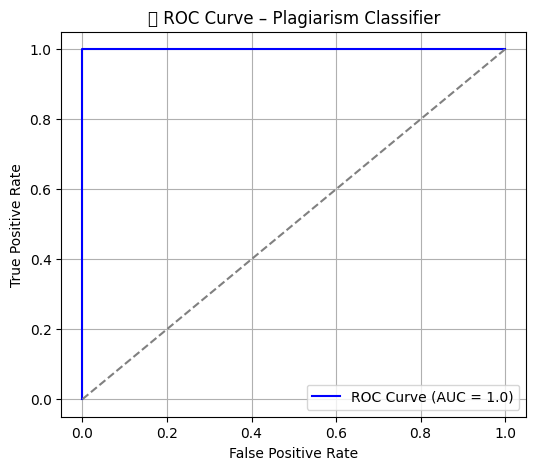

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, f1_score, roc_curve, roc_auc_score
)

# 📌 Step 2: Load Dataset
df = pd.read_csv("similarity_output_task3.csv")

# 📌 Step 3: Feature and Label Selection
X = df[["Similarity_Score"]]
y = df["Plagiarised"]

# 📌 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 📌 Step 7: Evaluate the Model
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📌 Step 8: ROC Curve & AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"🔵 ROC-AUC Score: {round(auc, 2)}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {round(auc, 2)})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve – Plagiarism Classifier")
plt.legend()
plt.grid(True)
plt.show()


🌳 Decision Tree Accuracy: 1.0
🌳 F1 Score: 1.0
Confusion Matrix:
 [[5 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



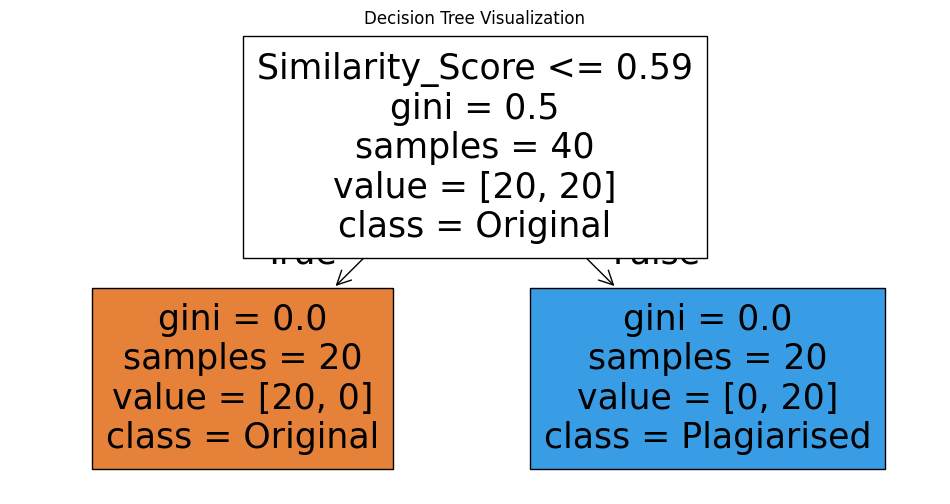

🌲 Random Forest Accuracy: 1.0
🌲 F1 Score: 1.0
Confusion Matrix:
 [[5 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

📊 Feature Importance of 'Similarity_Score': 1.0


In [2]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 📌 Step 2: Load Your Data
df = pd.read_csv("similarity_output_task3.csv")

# 📌 Step 3: Prepare Features and Labels
X = df[["Similarity_Score"]]
y = df["Plagiarised"]

# 📌 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Step 5: Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("🌳 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("🌳 F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 📌 Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=["Similarity_Score"], class_names=["Original", "Plagiarised"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 📌 Step 6: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🌲 F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 📌 Feature Importance (Only 1 feature here)
importance = rf_model.feature_importances_[0]
print(f"📊 Feature Importance of 'Similarity_Score': {round(importance, 4)}")
